<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
         survived      pclass         age       sibsp       parch        f

/tmp/ipython-input-1822352207.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)


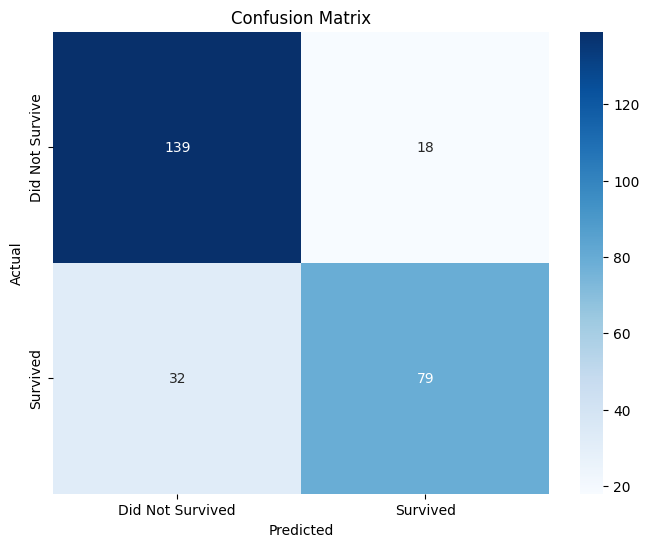

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,auc

#Load Titanic dataset
data = sns.load_dataset('titanic')
data.head()

#Display dataset info and statistics
print(data.info())
print(data.describe())

#Select Features
features=['pclass','sex','age','sibsp','parch','fare']
data=data[features + ['survived']]
data

#Handling missing values
data['age'].fillna(data['age'].median(), inplace=True)

#convert categorical column 'sex' to numerical
le= LabelEncoder()
data['sex']=le.fit_transform(data['sex'])

#Split features and target
x=data[features]
y=data['survived']

#Train-Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#Train logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=200)
model.fit(x_train,y_train)

#Prediction
y_pred=model.predict(x_test)

#Evaluation
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

#Confusion Matrix and Graph
cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Did Not Survived','Survived'],yticklabels=['Did Not Survive','Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()